In [1]:
import uproot
# import matplotlib as mpl

import matplotlib.pyplot as plt
# plt.style.use('style.mplstyle')
import mplhep
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
# mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
file = uproot.open("/sbnd/data/users/lynnt/wirecell/waveform.root")
raw = file['h1'].to_hist()
dec = file['h2'].to_hist()
sim = file['h3'].to_hist()


In [3]:
# data_array=[raw.values(),dec.values(),sim.values()]
data_array=[dec.values(),sim.values()]
labels=['decon','sim']

In [4]:
def gauss(x,a,mu,sigma):
    return a*np.exp(-0.5*((x-mu)/sigma)**2)

In [5]:
min_chID=0
max_chID = 11264

In [6]:


# plt.figure(figsize=(8,5))
integral_diff=[]
integral_diff_fit=[]

for channel in range(max_chID):

    # print("Channel #:",channel)

    total_integ=[]
    total_fit_integ=[]

    for i,data in enumerate(data_array):
        
        total_integral_value=0
        total_fit_integ=0
        peaks, pdict = find_peaks(data[channel,:],height=200,prominence=10,width=1,distance=5)
        # print(pdict)
        # mplhep.histplot(data[channel,:],yerr=False,histtype='step',label=labels[i],alpha=50)

        xvals = np.linspace(0,len(data[channel,:]),len(data[channel,:]))
        

        for adc in data[channel,:]:
            if (adc>0):
                total_integral_value+=adc
        total_integ.append(total_integral_value)

        # print(str(total_integral_value)+" for "+str(labels[i]))
        # print(total_integ)
    # print((total_integ[0]-total_integ[1])/total_integ[1])
    if (total_integ[1]!=0):
        integral_diff.append((total_integ[1]-total_integ[0])/total_integ[1])    
    else:
        integral_diff.append(-2.0)
      



        # if (len(peaks)>0):
                        
        #     plt.plot(peaks,pdict['peak_heights'],'*',markersize=10)
        #     # print("number of peaks:", len(peaks))
            

        #     for j in range(len(peaks)):
        #         peak_idx = j
        #         x0 = xvals[pdict['left_bases'][peak_idx]:pdict['right_bases'][peak_idx]]
        #         y0 = data[channel,:][pdict['left_bases'][peak_idx]:pdict['right_bases'][peak_idx]]
        #         sim0 = data[channel,:][pdict['left_bases'][peak_idx]:pdict['right_bases'][peak_idx]]
        #         popt, pcov = curve_fit(gauss, x0, y0, p0 = [pdict['peak_heights'][peak_idx],peaks[peak_idx],0.5*pdict['widths'][peak_idx]],maxfev=20000)
        #         # try:
        #         #     popt, pcov = curve_fit(gauss, x0, y0, p0 = [pdict['peak_heights'][peak_idx],peaks[peak_idx],0.5*pdict['widths'][peak_idx]],maxfev=10000)
        #         # except:RuntimeError
        #         # print("Error - curve_fit failed") 
        #         # if (popt[1]<max_chID and popt[1]>min_chID):
        #         mu=popt[1]
        #         plt.plot(x0, gauss(x0,*popt),'-.k',lw=2)
        #         # print(np.trapz(gauss(x0,*popt),x0))
        #         total_fit_integ+=np.trapz(gauss(x0,*popt),x0,dx=np.diff(x0)[0])

        # print(total_integ,total_fit_integ)

    # print(total_integ[0]-total_integ[1])    
    # plt.xlim(1150,1180)
    # plt.ylim(0,200)
    # plt.xlabel("ticks")
    # plt.legend()
    # plt.title(channel)
    # plt.savefig('good_peak_fit.pdf',dpi=500)
    # plt.show()
    

    #4694
    #6331

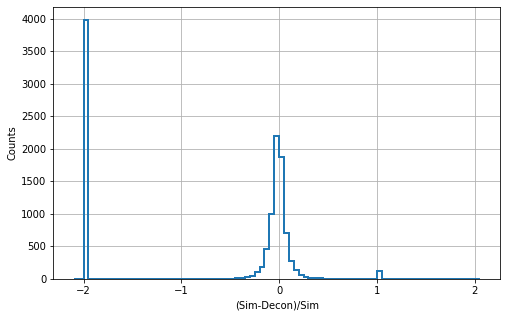

In [7]:
plt.figure(figsize=(8,5))
BINS=np.arange(-2.1,2.1,0.05)
plt.hist(integral_diff,bins=BINS,histtype='step',lw=2)
plt.xlabel('(Sim-Decon)/Sim')
plt.ylabel('Counts')
plt.grid()
plt.savefig('comparison.pdf',dpi=500)
plt.show()

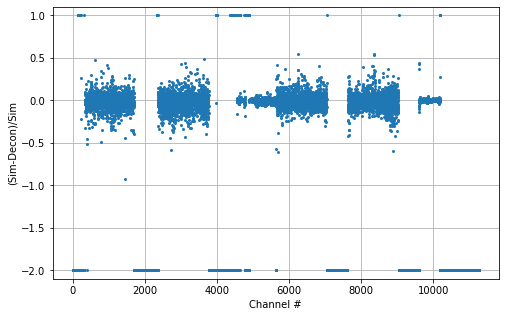

In [8]:
channel_idx=np.arange(0,len(integral_diff),1)
plt.figure(figsize=(8,5))
plt.plot(channel_idx,integral_diff,'o',markersize=2)
plt.xlabel('Channel #')
plt.ylabel('(Sim-Decon)/Sim')
plt.ylim(-2.1,1.1)
plt.grid()
plt.savefig('channel_view.pdf',dpi=500)
plt.show()